In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import json
import logging
from marshaltools import ProgramList
from astropy.time import Time
import astropy.units as u
import os

from Observatory import Observatory
from utils import get_config, plot_visibility, prepare_snifs_schedule

In [2]:
# If you are running this notebook for the first time, you will be prompted to enter your username and
# the path to your downloads from slack. If you entered something incorrectly, you can correct this in .config
config = get_config()

username = config['username']
date = '2018-09-27'
obs = 'uh88'
trange = [Time(date), Time(date)+u.day]

logpath = 'logs/'

# log
logger = logging.getLogger(username)
handler = logging.FileHandler(os.path.join(logpath, 'ztfcosmo_visibilty_%s_%s_%s.log'%(obs,date,username)))
handler.setLevel(logging.INFO)
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
handler.setFormatter(formatter)
logger.addHandler(handler)

In [3]:
observatories ={
    'uh88': Observatory('uh88', 19.8231, -155.47, 4205, sun_alt_th=-17, logger=logger),
    'ntt': Observatory('ntt', -29.25, -70.73, 2375, sun_alt_th=-12, logger=logger), # What's the twilight limit for ePESSTO?
    #'lco': Need coordinates for that
}

INFO:ufeindt:Initialized Observatory uh88 at position (lon 19.82 deg, lat -155.47 deg, alt: 4205.0 m)
INFO:ufeindt:Initialized Observatory ntt at position (lon -29.25 deg, lat -70.73 deg, alt: 2375.0 m)


In [4]:
pl = ProgramList('AMPEL Test')

targets = json.load(open('sne_following.json'))

INFO:marshaltools.ProgramList:Initialized ProgramList for program AMPEL Test (ID 10)
INFO:marshaltools.ProgramList:Loaded 192 saved sources for program AMPEL Test.


In [5]:
dark_time = observatories[obs].get_dark_times(trange)

obs_windows = {}
for snname, quality in targets.items():
    ra = pl.sources[snname]['ra']
    dec = pl.sources[snname]['dec']
    obs_w = observatories[obs].compute_visibility(ra, dec, trange)
    if len(obs_w['visible']) > 0:
        obs_windows[snname] = obs_w
    else:
        logger.info('Source %s (ra: %f, dec: %f) not observable with %s.'%(snname, ra, dec, obs))

INFO:ufeindt:computed dark times (sun_alt: -17.00) between 2018-09-27 00:00:00.000 and 2018-09-27 23:55:00.000. Total of 9.67 hours of dark
INFO:ufeindt:computing visibility of source at (ra: 301.674905, dec: 37.783455) from observatory uh88
INFO:ufeindt:using visibility constraints:
					-Time resolution: 5.00 min
					-Airmass limit: 2.00
					-Sun altitude: -17.00 deg
					-Moon distance: 30.00 deg
INFO:ufeindt:computed dark times (sun_alt: -17.00) between 2018-09-27 00:00:00.000 and 2018-09-27 23:55:00.000. Total of 9.67 hours of dark
INFO:ufeindt:source is visible for a total of 5.333 hours. Took 6.20e-01 sec
INFO:ufeindt:computing visibility of source at (ra: 330.124841, dec: 43.553731) from observatory uh88
INFO:ufeindt:using visibility constraints:
					-Time resolution: 5.00 min
					-Airmass limit: 2.00
					-Sun altitude: -17.00 deg
					-Moon distance: 30.00 deg
INFO:ufeindt:computed dark times (sun_alt: -17.00) between 2018-09-27 00:00:00.000 and 2018-09-27 23:55:00.000. T

INFO:ufeindt:computed dark times (sun_alt: -17.00) between 2018-09-27 00:00:00.000 and 2018-09-27 23:55:00.000. Total of 9.67 hours of dark
INFO:ufeindt:source is visible for a total of 3.333 hours. Took 6.14e-01 sec
INFO:ufeindt:computing visibility of source at (ra: 28.153562, dec: -13.056826) from observatory uh88
INFO:ufeindt:using visibility constraints:
					-Time resolution: 5.00 min
					-Airmass limit: 2.00
					-Sun altitude: -17.00 deg
					-Moon distance: 30.00 deg
INFO:ufeindt:computed dark times (sun_alt: -17.00) between 2018-09-27 00:00:00.000 and 2018-09-27 23:55:00.000. Total of 9.67 hours of dark
INFO:ufeindt:source is visible for a total of 0.000 hours. Took 6.03e-01 sec
INFO:ufeindt:Source ZTF18abuioue (ra: 28.153562, dec: -13.056826) not observable with uh88.
INFO:ufeindt:computing visibility of source at (ra: 292.497297, dec: 56.437386) from observatory uh88
INFO:ufeindt:using visibility constraints:
					-Time resolution: 5.00 min
					-Airmass limit: 2.00
					-

INFO:ufeindt:source is visible for a total of 7.667 hours. Took 7.22e-01 sec
INFO:ufeindt:computing visibility of source at (ra: 38.298011, dec: -1.305626) from observatory uh88
INFO:ufeindt:using visibility constraints:
					-Time resolution: 5.00 min
					-Airmass limit: 2.00
					-Sun altitude: -17.00 deg
					-Moon distance: 30.00 deg
INFO:ufeindt:computed dark times (sun_alt: -17.00) between 2018-09-27 00:00:00.000 and 2018-09-27 23:55:00.000. Total of 9.67 hours of dark
INFO:ufeindt:source is visible for a total of 0.000 hours. Took 8.11e-01 sec
INFO:ufeindt:Source ZTF18abtswjk (ra: 38.298011, dec: -1.305626) not observable with uh88.
INFO:ufeindt:computing visibility of source at (ra: 16.556125, dec: 40.764561) from observatory uh88
INFO:ufeindt:using visibility constraints:
					-Time resolution: 5.00 min
					-Airmass limit: 2.00
					-Sun altitude: -17.00 deg
					-Moon distance: 30.00 deg
INFO:ufeindt:computed dark times (sun_alt: -17.00) between 2018-09-27 00:00:00.000 and 

In [6]:
print('%i of %i targets are observable with %s.'%(len(obs_windows.keys()), len(targets), obs))

34 of 41 targets are observable with uh88.


In [7]:
# Sort the SNe by time of lowest airmass etc
snnames = list(obs_windows.keys())

# Sort by end of visibility
f_sort = lambda a: np.where(dark_time == obs_windows[a]['visible'][-1])[0][0]
snnames = sorted(snnames, key=f_sort)
# Sort by start of visibility
f_sort = lambda a: np.where(dark_time == obs_windows[a]['visible'][0])[0][0]
snnames = sorted(snnames, key=f_sort)
# Sort by time of best airmass
f_sort = lambda a: np.where(dark_time == obs_windows[a]['visible'][obs_windows[a]['airmass'] == min(obs_windows[a]['airmass'])])[0][0]
snnames = sorted(snnames, key=f_sort)
# Sort by priority (For now number of "Very Good" by last three scanners, should be refined)
f_sort = lambda a: 3 - len([b for b in targets[a] if b[0] == 'VeryGood'])
snnames = sorted(snnames, key=f_sort)
priorities = [f_sort(a) for a in snnames]

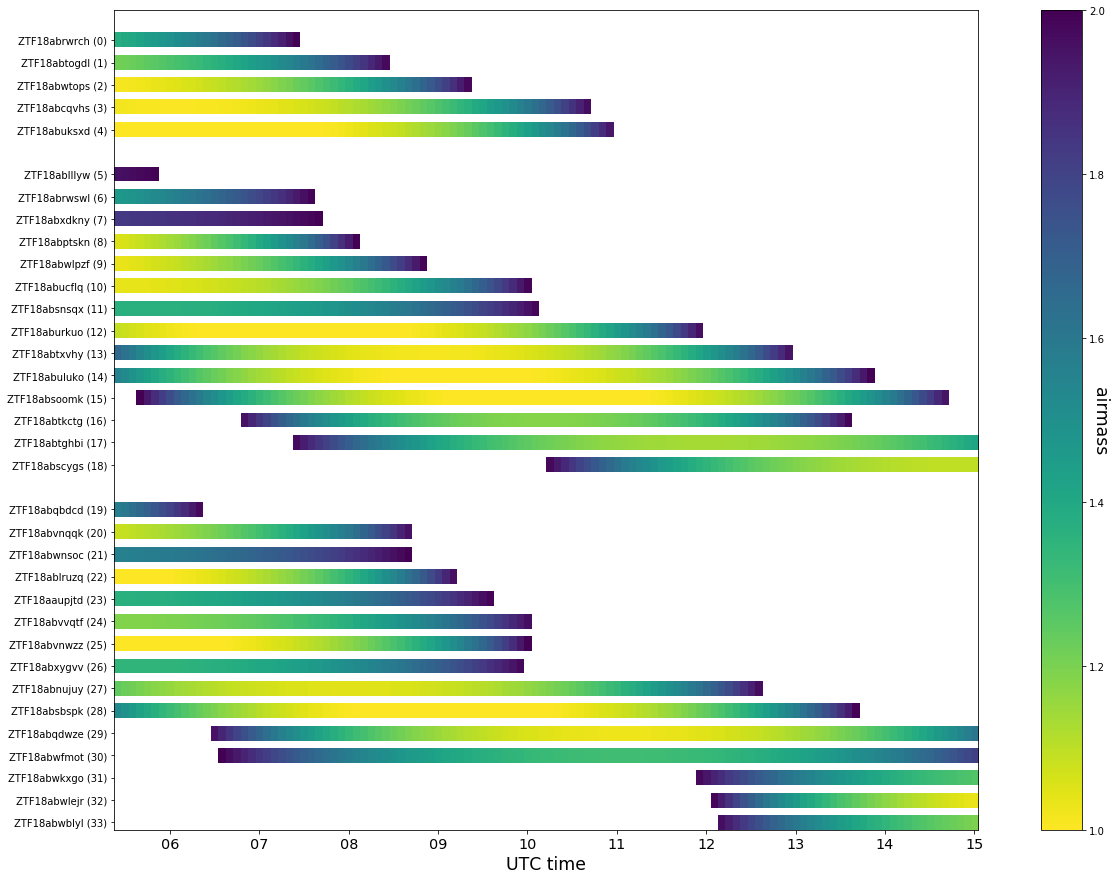

In [8]:
_ = plot_visibility(snnames, obs_windows, dark_time, priorities)

16 SNe selected


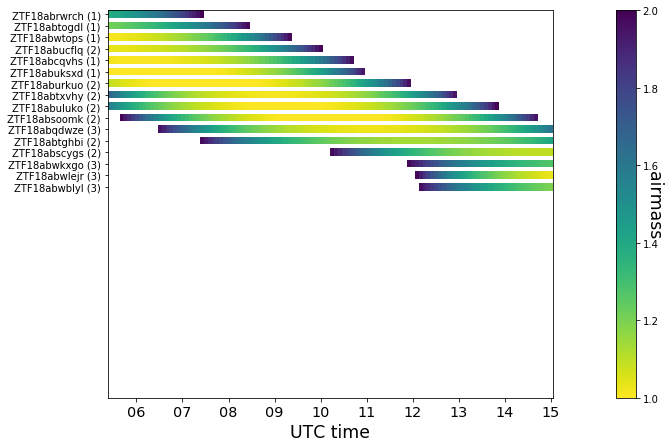

In [9]:
selected = [0, 1, 2, 3, 4, 10, 12, 13, 14, 15, 17, 18, 29, 31, 32, 33]
print('%i SNe selected'%len(selected))

snnames_selected = [snnames[k] for k in selected]
priorities_selected = [priorities[k] for k in selected]

sort_again = True
if sort_again:
    # sort them by time of lowest airmass again
    f_sort = lambda a: np.where(dark_time == obs_windows[a]['visible'][obs_windows[a]['airmass'] == min(obs_windows[a]['airmass'])])[0][0]
    tmp = sorted(zip(snnames_selected, priorities_selected) , key=lambda a: f_sort(a[0]))
    snnames_selected = [a[0] for a in tmp]
    priorities_selected = [a[1] for a in tmp]

_ = plot_visibility(snnames_selected, obs_windows, dark_time, priorities_selected, labeltype='priority')

In [10]:
# SANITY CHECK!
# For the beginning it might be good to double check the selected targets on the marshal.
for k in selected:
    print('Please double check whether %s (prioty %i) is a good target:'%(snnames[k], priorities[k]))
    print('http://skipper.caltech.edu:8080/cgi-bin/growth/view_source.cgi?name=%s'%snnames[k])

Please double check whether ZTF18abrwrch (prioty 1) is a good target:
http://skipper.caltech.edu:8080/cgi-bin/growth/view_source.cgi?name=ZTF18abrwrch
Please double check whether ZTF18abtogdl (prioty 1) is a good target:
http://skipper.caltech.edu:8080/cgi-bin/growth/view_source.cgi?name=ZTF18abtogdl
Please double check whether ZTF18abwtops (prioty 1) is a good target:
http://skipper.caltech.edu:8080/cgi-bin/growth/view_source.cgi?name=ZTF18abwtops
Please double check whether ZTF18abcqvhs (prioty 1) is a good target:
http://skipper.caltech.edu:8080/cgi-bin/growth/view_source.cgi?name=ZTF18abcqvhs
Please double check whether ZTF18abuksxd (prioty 1) is a good target:
http://skipper.caltech.edu:8080/cgi-bin/growth/view_source.cgi?name=ZTF18abuksxd
Please double check whether ZTF18abucflq (prioty 2) is a good target:
http://skipper.caltech.edu:8080/cgi-bin/growth/view_source.cgi?name=ZTF18abucflq
Please double check whether ZTF18aburkuo (prioty 2) is a good target:
http://skipper.caltech.e

In [11]:
if obs == 'uh88':
    prepare_snifs_schedule(snnames_selected, pl.sources, obs_windows, date, logger=logger)

INFO:ufeindt:ZTF18abrwrch was previously scheduled and will not be include in fchart again(but will be scheduled).
INFO:ufeindt:ZTF18abtogdl was previously scheduled and will not be include in fchart again(but will be scheduled).
INFO:ufeindt:ZTF18abwtops was previously scheduled and will not be include in fchart again(but will be scheduled).
INFO:ufeindt:ZTF18abucflq was previously scheduled and will not be include in fchart again(but will be scheduled).
INFO:ufeindt:ZTF18abcqvhs was previously scheduled and will not be include in fchart again(but will be scheduled).
INFO:ufeindt:ZTF18abuksxd was previously scheduled and will not be include in fchart again(but will be scheduled).
INFO:ufeindt:ZTF18aburkuo was previously scheduled and will not be include in fchart again(but will be scheduled).
INFO:ufeindt:ZTF18abtxvhy was previously scheduled and will not be include in fchart again(but will be scheduled).
INFO:ufeindt:ZTF18abuluko was previously scheduled and will not be include in fc